In [1]:
import tensorflow as tf
import pandas as pd

dataset_path = tf.keras.utils.get_file('auto-mpg.data',
                                      'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
print(dataset_path)

32768/30286 [================================] - 2s 58us/step
/home/user/.keras/datasets/auto-mpg.data


In [14]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()

In [8]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [9]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [15]:
# 删除缺失值
print(dataset.isna().sum())
print(len(dataset))
print('------------------------------------')
dataset = dataset.dropna()
print(dataset.isna().sum())
print(len(dataset))

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
398
------------------------------------
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
392


In [16]:
print(set(dataset['Origin']))

{1, 2, 3}


In [17]:
# 处理产地特征，用于统一含义
origin = dataset.pop('Origin')

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
5    15.0          8         429.0       198.0  4341.0          10.0   
6    14.0          8         454.0       220.0  4354.0           9.0   
7    14.0          8         440.0       215.0  4312.0           8.5   
8    14.0          8         455.0       225.0  4425.0          10.0   
9    15.0          8         390.0       190.0  3850.0           8.5   
10   15.0          8         383.0       170.0  3563.0          10.0   
11   14.0          8         340.0       160.0  3609.0           8.0   
12   15.0          8         400.0       150.0  3761.0          

In [18]:
dataset['USA'] = (origin==1)*1.0
dataset['Europe'] = (origin==2)*1.0
dataset['Japan'] = (origin==3)*1.0

In [20]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [21]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(len(train_dataset))
print(len(test_dataset))

314
78


In [22]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [27]:
train_stats = train_dataset.describe()
print(train_stats)

        Cylinders  Displacement  Horsepower       Weight  Acceleration  \
count  314.000000    314.000000  314.000000   314.000000    314.000000   
mean     5.477707    195.318471  104.869427  2990.251592     15.559236   
std      1.699788    104.331589   38.096214   843.898596      2.789230   
min      3.000000     68.000000   46.000000  1649.000000      8.000000   
25%      4.000000    105.500000   76.250000  2256.500000     13.800000   
50%      4.000000    151.000000   94.500000  2822.500000     15.500000   
75%      8.000000    265.750000  128.000000  3608.000000     17.200000   
max      8.000000    455.000000  225.000000  5140.000000     24.800000   

       Model Year         USA      Europe       Japan  
count  314.000000  314.000000  314.000000  314.000000  
mean    75.898089    0.624204    0.178344    0.197452  
std      3.675642    0.485101    0.383413    0.398712  
min     70.000000    0.000000    0.000000    0.000000  
25%     73.000000    0.000000    0.000000    0.000000

In [28]:
train_stats = train_stats.transpose()
print(train_stats)

              count         mean         std     min      25%     50%  \
Cylinders     314.0     5.477707    1.699788     3.0     4.00     4.0   
Displacement  314.0   195.318471  104.331589    68.0   105.50   151.0   
Horsepower    314.0   104.869427   38.096214    46.0    76.25    94.5   
Weight        314.0  2990.251592  843.898596  1649.0  2256.50  2822.5   
Acceleration  314.0    15.559236    2.789230     8.0    13.80    15.5   
Model Year    314.0    75.898089    3.675642    70.0    73.00    76.0   
USA           314.0     0.624204    0.485101     0.0     0.00     1.0   
Europe        314.0     0.178344    0.383413     0.0     0.00     0.0   
Japan         314.0     0.197452    0.398712     0.0     0.00     0.0   

                  75%     max  
Cylinders        8.00     8.0  
Displacement   265.75   455.0  
Horsepower     128.00   225.0  
Weight        3608.00  5140.0  
Acceleration    17.20    24.8  
Model Year      79.00    82.0  
USA              1.00     1.0  
Europe       

In [31]:
normed_train_data = (train_dataset - train_stats['mean']) / train_stats['std']
normed_test_data = (test_dataset - train_stats['mean']) / train_stats['std']

In [32]:
print(normed_train_data.shape, train_labels.shape)
print(normed_test_data.shape, test_labels.shape)

(314, 9) (314,)
(78, 9) (78,)


In [51]:
train_db = tf.data.Dataset.from_tensor_slices((normed_train_data.values, train_labels.values))
train_db = train_db.shuffle(100)
train_db = train_db.batch(32)

In [59]:
test_db = tf.data.Dataset.from_tensor_slices((normed_test_data.values, test_labels.values))
test_db = test_db.batch(32)

In [42]:
# 自定义网络
class Network(tf.keras.Model):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = tf.keras.layers.Dense(64, activation='relu')
        self.fc2 = tf.keras.layers.Dense(64, activation='relu')
        self.fc3 = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [64]:
model = Network()
model.build(input_shape=(None, 9)) #就只是为了打印model的summary而存在的
model.summary()
opt = tf.keras.optimizers.RMSprop(0.001)

train_loss = []
test_loss = []

for epoch in range(500):
    for step, (x, y) in enumerate(train_db):
        with tf.GradientTape() as tape:
            out = model(x)
            loss = tf.reduce_mean(tf.keras.losses.MAE(y, out))
        grads = tape.gradient(loss, model.trainable_variables)
        opt.apply_gradients(zip(grads, model.trainable_variables))
    train_loss.append(float(loss))
    
    for step, (testx, testy) in enumerate(test_db):
        testout = model(testx)
        testloss = tf.reduce_mean(tf.keras.losses.MAE(testy, testout))
    
    test_loss.append(float(testloss))
    if epoch % 10 == 0:
        print(epoch, float(loss), float(testloss))

W0227 22:08:38.275058 140099334944576 base_layer.py:1814] Layer network_17 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Model: "network_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             multiple                  640       
_________________________________________________________________
dense_52 (Dense)             multiple                  4160      
_________________________________________________________________
dense_53 (Dense)             multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
0 20.771202087402344 28.71592140197754
10 7.550487995147705 7.370554447174072
20 6.857614517211914 7.7339959144592285
30 6.154942512512207 7.938244342803955
40 6.14981746673584 8.101771354675293
50 7.6220622062683105 8.420215606689453
60 6.758851051330566 8.223867416381836
70 5.799417495727539 8.60400676727295
80 7.465566635131836 7.932101726531982
90 7.348954200744629 7.8685479164

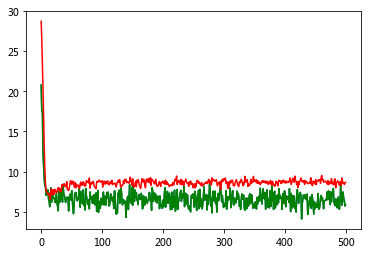

In [68]:
import matplotlib.pyplot as plt
import numpy as np

x_index = np.arange(500)
plt.plot(x_index, np.array(train_loss), color='green')
plt.plot(x_index, np.array(test_loss), color='red')
plt.show()

In [67]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the  appearance. Line properties and *fmt* can be mixed.
    The following two calls yield identical resu